In [8]:
import pandas as pd
df = pd.read_csv('C:/Users/hadi_/OneDrive/Documents/detect_phishing_phrases_dataset.csv')
df.head()

,Request,Keyword_Count,Pattern_Match,Contextual_Flag,Label
0,"Client file report is required, please forward...",0.0,False,0.0,blocked
1,Can I provide details on the price of laptops?,0.0,False,0.0,normal
2,Social security number credentials is required...,0.0,False,0.0,blocked
3,Can I show me car reviews?,0.0,False,0.0,normal
4,Do you mind give me information on the price o...,0.0,False,0.0,normal


In [9]:
df.tail()

,Request,Keyword_Count,Pattern_Match,Contextual_Flag,Label
1495,Can you tell me about movie showtimes?,0.0,False,0.0,normal
1496,Can you search for flights to Paris?,0.0,False,NaN,normal
1497,Find find flights to Paris?,0.0,False,0.0,normal
1498,I need to search for weather forecast?,0.0,False,0.0,normal
1499,Can I search for coffee shops nearby?,0.0,False,0.0,normal


In [10]:
df.describe()

,Keyword_Count,Contextual_Flag
count,1425.000000,1425.000000
mean,0.119298,0.074386
std,0.324253,0.262490
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [11]:
df.isnull()

,Request,Keyword_Count,Pattern_Match,Contextual_Flag,Label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1495,False,False,False,False,False
1496,False,False,False,True,False
1497,False,False,False,False,False
1498,False,False,False,False,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Request          1500 non-null   object 
 1   Keyword_Count    1425 non-null   float64
 2   Pattern_Match    1425 non-null   object 
 3   Contextual_Flag  1425 non-null   float64
 4   Label            1500 non-null   object 
dtypes: float64(2), object(3)
memory usage: 58.7+ KB


Data Cleaning Phase

In [14]:
# Dropping All Null Requests
df_cleaned = df.dropna(subset=["Request"])

# Fill in the remaining missing values
df_cleaned["Keyword_Count"].fillna(df_cleaned["Keyword_Count"].median(), inplace=True)
df_cleaned["Pattern_Match"].fillna(df_cleaned["Pattern_Match"].median(), inplace=True)
df_cleaned["Contextual_Flag"].fillna(df_cleaned["Contextual_Flag"].median(), inplace=True)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Request          1500 non-null   object 
 1   Keyword_Count    1500 non-null   float64
 2   Pattern_Match    1500 non-null   object 
 3   Contextual_Flag  1500 non-null   float64
 4   Label            1500 non-null   object 
dtypes: float64(2), object(3)
memory usage: 58.7+ KB


C:\Users\hadi_\AppData\Local\Temp\ipykernel_15636\85863192.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Keyword_Count"].fillna(df_cleaned["Keyword_Count"].median(), inplace=True)
C:\Users\hadi_\AppData\Local\Temp\ipykernel_15636\85863192.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

We start to remove outliers and noise

In [16]:
df_cleaned.isnull()

,Request,Keyword_Count,Pattern_Match,Contextual_Flag,Label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1495,False,False,False,False,False
1496,False,False,False,False,False
1497,False,False,False,False,False
1498,False,False,False,False,False


In [17]:
df_cleaned.describe()

,Keyword_Count,Contextual_Flag
count,1500.000000,1500.000000
mean,0.113333,0.070667
std,0.317106,0.256353
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [18]:
# We set keyword count at the 99th percentile, any data outside that threshold are outliers and will be removed
keyword_count_threshold = df_cleaned["Keyword_Count"].quantile(0.99)
df_cleaned["Keyword_Count"] = df_cleaned["Keyword_Count"].clip(upper=keyword_count_threshold)

# Any requests with less than three words are removed as they are meaningless
df_cleaned = df_cleaned[df_cleaned["Request"].str.split().str.len() >= 3]

In [19]:
print(df_cleaned.describe())
print(df_cleaned["Request"].head())

       Keyword_Count  Contextual_Flag
count    1500.000000      1500.000000
mean        0.113333         0.070667
std         0.317106         0.256353
min         0.000000         0.000000
25%         0.000000         0.000000
50%         0.000000         0.000000
75%         0.000000         0.000000
max         1.000000         1.000000
0    Client file report is required, please forward...
1       Can I provide details on the price of laptops?
2    Social security number credentials is required...
3                           Can I show me car reviews?
4    Do you mind give me information on the price o...
Name: Request, dtype: object


In [20]:
short_requests = df_cleaned[df_cleaned["Request"].str.split().str.len() < 3]
print(short_requests)

Empty DataFrame
Columns: [Request, Keyword_Count, Pattern_Match, Contextual_Flag, Label]
Index: []


Final results: No changes were made as there are no signnificant nosie or outliers in this dataset, and there are no requests with less than three words
Not a suprise considering the size of the dataset

Next we start doing text preprocessing and feature extraction

In [23]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# This is for text preprocessing, we want to convert all text to lowercase and remove punctuation
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Applying the function to the 'Request' column
df_cleaned['Processed_Request'] = df_cleaned['Request'].apply(preprocess_text)

# This is for Feature extraction using TF-IDF which convert the cleaned text from the last function into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000) 
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned['Processed_Request'])

# We then Convert the TF-IDF matrix to a DataFrame for easy inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# We Combine the TF-IDF features with the original data
df_final = pd.concat([df_cleaned.reset_index(drop=True), tfidf_df], axis=1)

# Drop the original 'Request' and 'Processed_Request' columns (if not needed)
df_final.drop(columns=['Request', 'Processed_Request'], inplace=True)

# Final DataFrame is now ready for model training
print(df_final.head())


   Keyword_Count Pattern_Match  Contextual_Flag    Label       car  card  \
0            0.0         False              0.0  blocked  0.000000   0.0   
1            0.0         False              0.0   normal  0.000000   0.0   
2            0.0         False              0.0  blocked  0.000000   0.0   
3            0.0         False              0.0   normal  0.707107   0.0   
4            0.0         False              0.0   normal  0.000000   0.0   

     client  coffee  confidential  credentials  ...  security      send  \
0  0.475122     0.0           0.0     0.000000  ...  0.000000  0.000000   
1  0.000000     0.0           0.0     0.000000  ...  0.000000  0.000000   
2  0.000000     0.0           0.0     0.424119  ...  0.418605  0.449584   
3  0.000000     0.0           0.0     0.000000  ...  0.000000  0.000000   
4  0.000000     0.0           0.0     0.000000  ...  0.000000  0.000000   

   share  shops  showtimes    social  technology  tell  updates  weather  
0    0.0    0.0  

We can see the final outcome with each word has its own number that define how important it is, words with socres close to zero are not signficant such as social, but words with higher scores will be considred 

Clean up before modeling

In [26]:
print(len(tfidf_vectorizer.get_feature_names_out()))  # Number of features to test with, but some feature are propably messed up with tokens


51


In [27]:
# We created a list of the TF-IDF feature names and inspected them
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# We used a list to filter out numeric tokens (these are the ones that contain only digits like 1077)
numeric_features = [feature for feature in tfidf_feature_names if feature.isdigit()]

# We Dropped those numeric features from the final dataset
df_final_cleaned = df_final.drop(columns=numeric_features)

print(f"Removed numeric tokens: {numeric_features}")
print(df_final_cleaned.head())


Removed numeric tokens: []
   Keyword_Count Pattern_Match  Contextual_Flag    Label       car  card  \
0            0.0         False              0.0  blocked  0.000000   0.0   
1            0.0         False              0.0   normal  0.000000   0.0   
2            0.0         False              0.0  blocked  0.000000   0.0   
3            0.0         False              0.0   normal  0.707107   0.0   
4            0.0         False              0.0   normal  0.000000   0.0   

     client  coffee  confidential  credentials  ...  security      send  \
0  0.475122     0.0           0.0     0.000000  ...  0.000000  0.000000   
1  0.000000     0.0           0.0     0.000000  ...  0.000000  0.000000   
2  0.000000     0.0           0.0     0.424119  ...  0.418605  0.449584   
3  0.000000     0.0           0.0     0.000000  ...  0.000000  0.000000   
4  0.000000     0.0           0.0     0.000000  ...  0.000000  0.000000   

   share  shops  showtimes    social  technology  tell  updates  

Unlike past tests this iteration did not have any tokens to remove, With that only decimals are left in the dataset and that ensures we will only test for data in the range of 0 to 1. These full numbers would cause a false postive in normal phrases. We shall now move into modeling

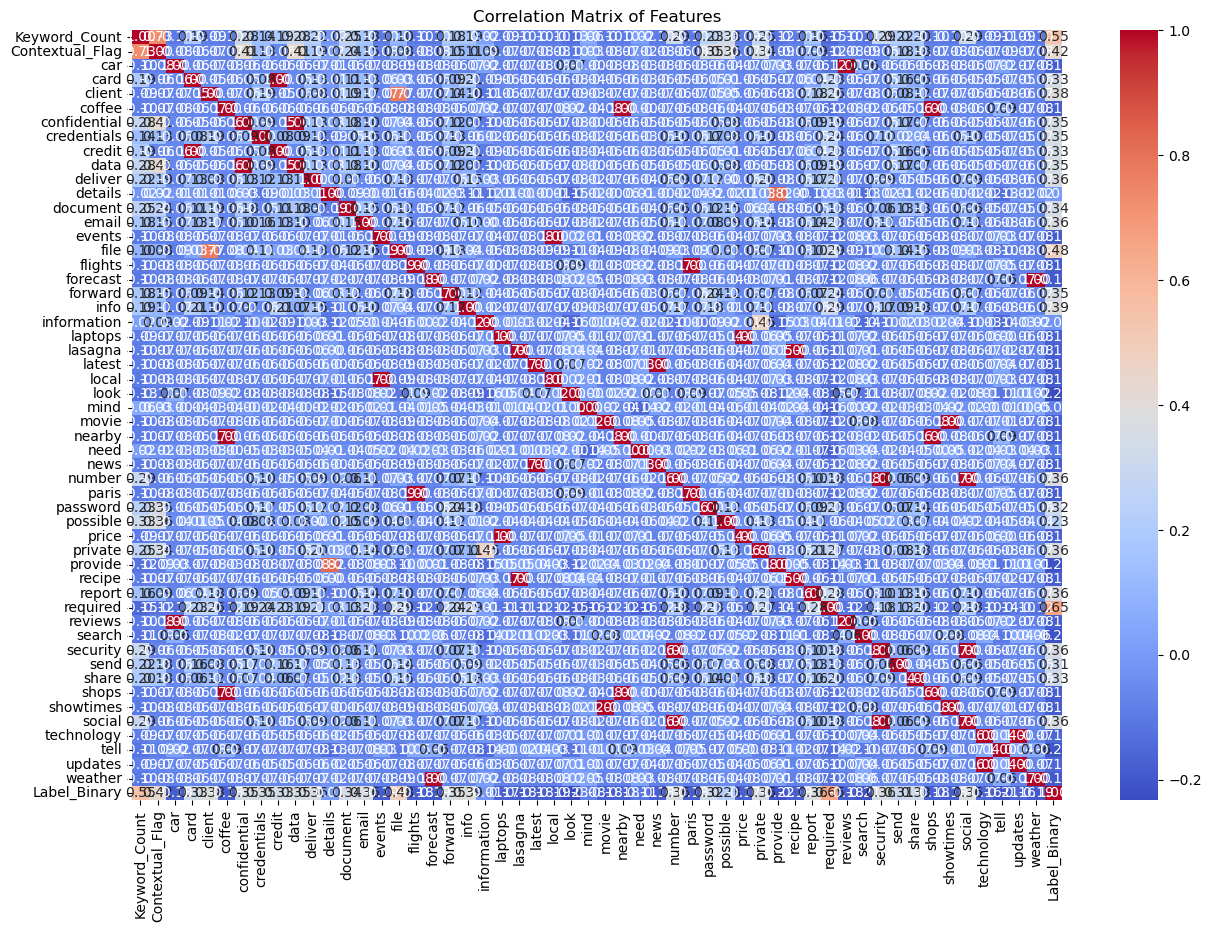

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# We want to first create the correlation matrix for numerical columns
df_final_cleaned['Label_Binary'] = df_final_cleaned['Label'].apply(lambda x: 1 if x == 'blocked' else 0)
numeric_columns = df_final_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_final_cleaned[numeric_columns].corr()

# Build the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


Analyzing this map, I can say not all the words in the dataset are present but those with highest flag are, important to note, our labels are 1 for blocked and 0 for normal, the closer a phrase gets to 1, it will be blocked

Logistic Regression with Confusion Matrix

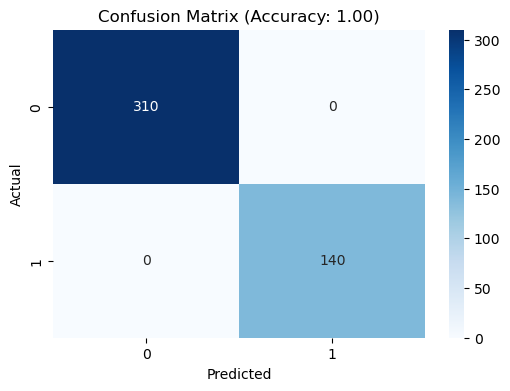

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       140

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Set up our features and labels
X = df_final_cleaned.drop(columns=['Label', 'Label_Binary']) 
y = df_final_cleaned['Label_Binary'] 

# Train-test split we chose a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calling and Training our Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluating the model using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title(f'Confusion Matrix (Accuracy: {acc_score:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))


End result of this is a perfect prediction accuracy for both true postive and true negative, However this is the main limitation of the notebook
it does not represent real-world cases, the dataset is not complex enough and their is a need for testing on larger and more diverse datasets, the features are easy to predict which I believe caused overfitting, but on the good side the data seems balanced with 310 normal and 140 blocked hence the model is not biased

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, y, cv=10)
print("Cross-Validation scores: ", scores)

Cross-Validation scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Cross Validation results does reinforce that the dataset features are easy, Future work includes testing on a bigger and more complex dataset, as well as exploring LSTM model to capture sequntial patterns